In [40]:
import json
from pager import PageModel, PageModelUnit, WordsAndStylesModel, SpGraph4NModel, WordsAndStylesToSpGraph4N
from pager.page_model.sub_models.dtype import Style, StyleWord, ImageSegment

In [41]:
page_model = PageModel([
    PageModelUnit("words_and_styles", sub_model=WordsAndStylesModel(), extractors=[], converters={}),
    PageModelUnit("graph", sub_model=SpGraph4NModel(), extractors=[],  converters={"words_and_styles": WordsAndStylesToSpGraph4N()}),
])

In [42]:
with open("PMC3810709_00003.jpg.json", "r") as f:
    info_img = json.load(f)

In [43]:
publaynet_rez = info_img["blocks"]
pager_rez = info_img["additional_info"]

In [44]:
print(publaynet_rez[0])
print("words:\n", pager_rez["words"][0])
print("styles:\n", pager_rez["styles"][0])

{'x_top_left': 59, 'y_top_left': 84, 'width': 473, 'height': 17, 'label': 1}
words:
 {'content': 'Modeling', 'style_id': 0, 'segment': {'x_top_left': 403, 'x_bottom_right': 440, 'y_top_left': 60, 'y_bottom_right': 69}, 'type_align': None}
styles:
 {'font2vec': [0.6527233115468409, 0.9803921568627452, 0.84568097509274, 0.07469064021398707, 0.8456809750927399, 0.6666666666666666, 0.2222222222222222], 'id': 0}


In [45]:
page_model.from_dict(pager_rez)
page_model.extract()
graph = page_model.to_dict()

In [46]:
blocks = [ImageSegment(dict_p_size=bl) for bl in publaynet_rez]
page_model.page_units[0].sub_model.words[1].segment.is_intersection(blocks[1])

False

In [47]:
page_model.page_units[0].sub_model.words[2].segment.get_segment_2p()

{'x_top_left': 478,
 'x_bottom_right': 509,
 'y_top_left': 49,
 'y_bottom_right': 77}

In [48]:
blocks[0].get_segment_2p()

{'x_top_left': 59,
 'x_bottom_right': 532,
 'y_top_left': 84,
 'y_bottom_right': 101}

In [49]:
import matplotlib.pyplot as plt

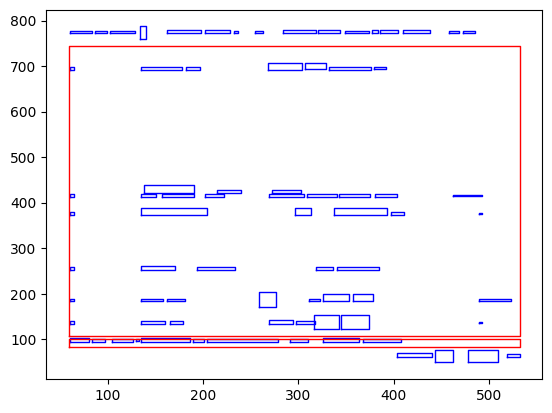

In [50]:
for seg_w in [w.segment for w in page_model.page_units[0].sub_model.words]:
    seg_w.plot()

for b in blocks:
    b.plot(color="r")

In [60]:

def is_one_block(word1, word2, blocks):
    for block in blocks:
        if block.is_intersection(word1) and block.is_intersection(word2):
            return 1
    return 0
words = [w.segment for w in page_model.page_units[0].sub_model.words]
edges_ind = [is_one_block(words[i],words[j], blocks) for i, j in zip(graph["A"][0], graph["A"][1])]

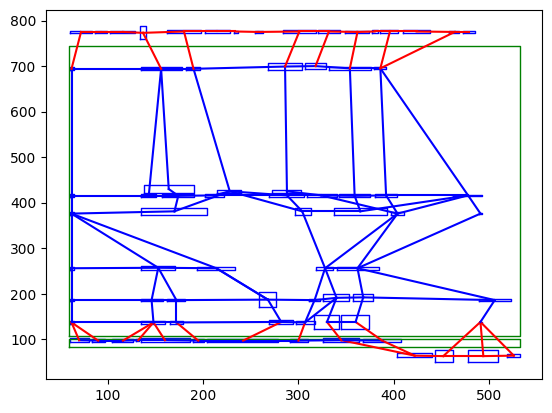

In [63]:
for seg_w in [w.segment for w in page_model.page_units[0].sub_model.words]:
    seg_w.plot()

for b in blocks:
    b.plot(color="g")

for ind, edge1, edge2 in zip(edges_ind, graph["A"][0], graph["A"][1]):
    x1, y1 = words[edge1].get_center()
    x2, y2 = words[edge2].get_center()
    plt.plot([x1, x2], [y1, y2], color="b" if ind==1 else "r")